In [68]:
import numpy as np
import pylab as pl
import icgalp_functions as ic
import scipy.io as sio
from matplotlib import rc

In [69]:
#initialize variables

#set seed
np.random.seed(24)

#Set dimension of problem
n = 1024

#Set batchsize for use in variance reduction
batchsize = [32, 256]

#Alternate choice for the matrix A
#A = np.ones(n)
#for i in range(A.shape[0]):
#    if i % 2 == 1:
#        A[i] = -A[i]
#A = np.vstack([A, A])

#Generate random A
A = np.random.uniform(-1, 1, 2 * n).reshape(2, n)

#generate y
y = np.random.uniform(-1, 1, n)
#scale y to be outside of the l1 unit ball
y = 1.5 * (y/np.linalg.norm(y, 1))

In [70]:
#Set the parameters

#gamma is defined to be (log(k+2)^a)/((k+1)^(1-b))
a = 0.0
#b must be < 1/3
epsi = 0.15
b = 1./3 - epsi
#s is the exponent in the stochastic weight, nu_k = gamma_k ^ s
#s must be < epsi
s = epsi - 0.001
#Rho is the augmented lagrangian parameter, taken to be constant
Rho = (2 ** (2-b)) + 1
#delta is the radius of the l1 ball
delta = 1.0
#number of iterations for each method
itera = 10 ** 5

In [71]:
#Use GFB to find x* to high precision
xstar = ic.gfb(y, A, delta, 10 ** 5)

100% (100000 of 100000) |################| Elapsed Time: 0:02:43 Time:  0:02:43


In [72]:
#Check the sparsity of x*
print('The number of nonzero entries in xstar is: '+str(np.count_nonzero(np.absolute(xstar) > 10 ** -8))+' out of '+str(n))

The number of nonzero entries in xstar is: 841 out of 1024


In [73]:
#Run CGALP exactly as a baseline
#prefix cg
cgx, cgmu, cgerg, cgfeas, cgdist = ic.cgalp(y, A, delta, b, a, Rho, itera, xstar)

100% (999999 of 999999) |################| Elapsed Time: 0:01:46 Time:  0:01:46


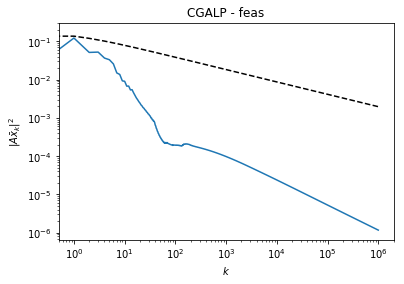

In [111]:
pl.plot(cgfeas)
pl.plot(range(itera), (1.4 * np.max(cgfeas))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|A\bar{x}_k\|^2$')
pl.title('CGALP - feas')
pl.show()

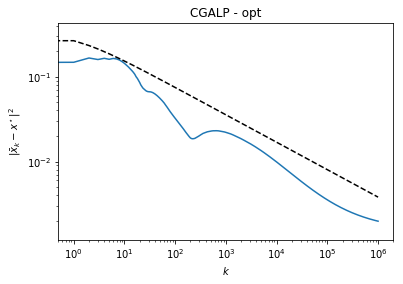

In [112]:
pl.plot(cgdist)
pl.plot(range(itera), (2* np.max(cgdist))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|\bar{x}_k-x^\star\|^2$')
pl.title('CGALP - opt')
pl.show()

In [76]:
#Run sweeping (partial)
#prefix swf
swfx, swfmu, swferg, swffeas, swfdist = ic.icgalp_swf(y, A, delta, b, a, Rho, itera, xstar)

100% (999999 of 999999) |################| Elapsed Time: 0:01:37 Time:  0:01:37


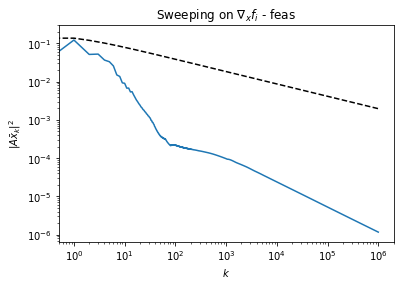

In [115]:
pl.plot(swffeas)
pl.plot(range(itera), (1.4* np.max(swffeas))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|A\bar{x}_k\|^2$')
pl.title(r'Sweeping on $\nabla_x f_i$ - feas')
pl.show()

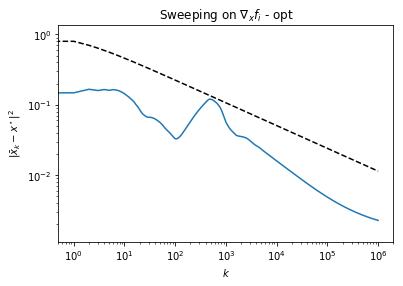

In [117]:
pl.plot(swfdist)
pl.plot(range(itera), (6 * np.max(swfdist))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|\bar{x}_k-x^\star\|^2$')
pl.title(r'Sweeping on $\nabla_x f_i$ - opt')
pl.show()

In [79]:
#Run Variance Reduction (partial)
#prefix vrf
vrfx, vrfmu, vrferg, vrffeas, vrfdist = ic.icgalp_vrf(y, A, delta, s, b, a, Rho, itera, xstar)

100% (999999 of 999999) |################| Elapsed Time: 0:01:58 Time:  0:01:58


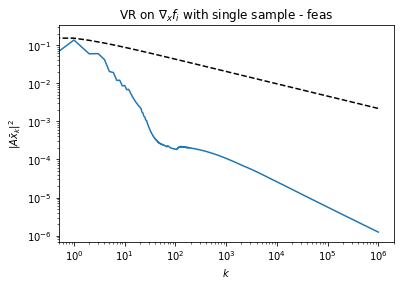

In [119]:
pl.plot(vrffeas)
pl.plot(range(itera), (1.4* np.max(vrffeas))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|A\bar{x}_k\|^2$')
pl.title(r'VR on $\nabla_x f_i$ with single sample - feas')
pl.show()

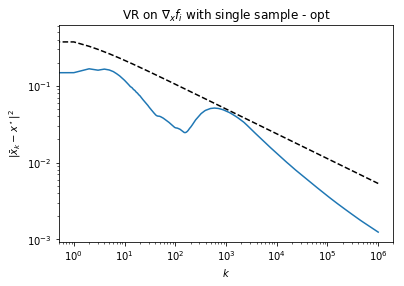

In [122]:
pl.plot(vrfdist)
pl.plot(range(itera), (2.8 * np.max(vrfdist))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|\bar{x}_k-x^\star\|^2$')
pl.title(r'VR on $\nabla_x f_i$ with single sample - opt')
pl.show()

In [82]:
#Run Variance Reduction with small batch (partial)
#prefix vrfb
vrfbx, vrfbmu, vrfberg, vrfbfeas, vrfbdist = ic.icgalp_vrfb(y, A, batchsize[0], delta, s, b, a, Rho, itera, xstar)

100% (999999 of 999999) |################| Elapsed Time: 0:03:08 Time:  0:03:08


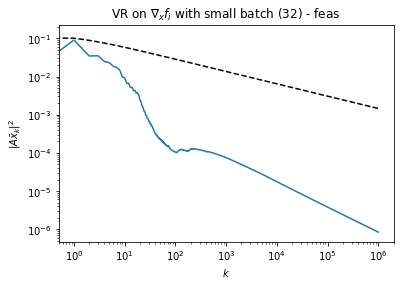

In [123]:
pl.plot(vrfbfeas)
pl.plot(range(itera), (1.4* np.max(vrfbfeas))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|A\bar{x}_k\|^2$')
pl.title(r'VR on $\nabla_x f_i$ with small batch ('+str(batchsize[0])+') - feas')
pl.show()

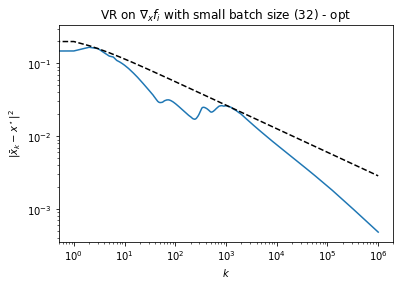

In [128]:
pl.plot(vrfbdist)
pl.plot(range(itera), (1.5* np.max(vrfbdist))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|\bar{x}_k-x^\star\|^2$')
pl.title(r'VR on $\nabla_x f_i$ with small batch size ('+str(batchsize[0])+') - opt')
pl.show()

In [85]:
#Run Variance Reduction with big batch (partial)
#prefix bigb
bigbx, bigbmu, bigberg, bigbfeas, bigbdist = ic.icgalp_vrfb(y, A, batchsize[1], delta, s, b, a, Rho, itera, xstar)

100% (999999 of 999999) |################| Elapsed Time: 0:05:05 Time:  0:05:05


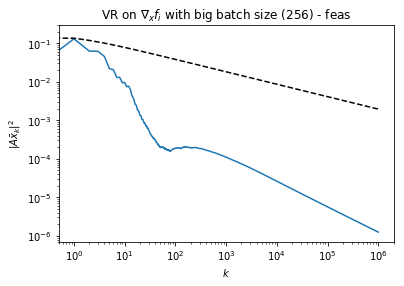

In [130]:
pl.plot(bigbfeas)
pl.plot(range(itera), (1.3* np.max(bigbfeas))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|A\bar{x}_k\|^2$')
pl.title(r'VR on $\nabla_x f_i$ with big batch size ('+str(batchsize[1])+') - feas')
pl.show()

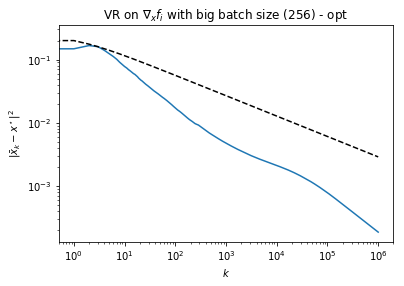

In [131]:
pl.plot(bigbdist)
pl.plot(range(itera), (1.5 * np.max(bigbdist))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|\bar{x}_k-x^\star\|^2$')
pl.title(r'VR on $\nabla_x f_i$ with big batch size ('+str(batchsize[1])+') - opt')
pl.show()

In [88]:
#Run Variance Reduction with small batch (FULL)
vrbx, vrbmu, vrberg, vrbfeas, vrbdist = ic.icgalp_vrb(y, A, batchsize[0], delta, s, b, a, Rho, itera, xstar)

100% (999999 of 999999) |################| Elapsed Time: 0:03:25 Time:  0:03:25


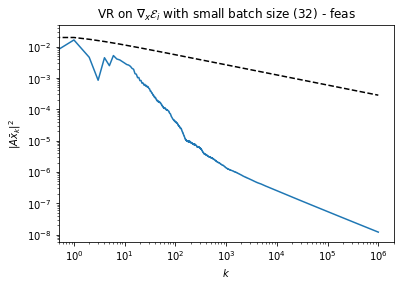

In [132]:
pl.plot(vrbfeas)
pl.plot(range(itera), (1.5*  np.max(vrbfeas))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|A\bar{x}_k\|^2$')
pl.title(r'VR on $\nabla_x \mathcal{E}_i$ with small batch size ('+str(batchsize[0])+') - feas')
pl.show()

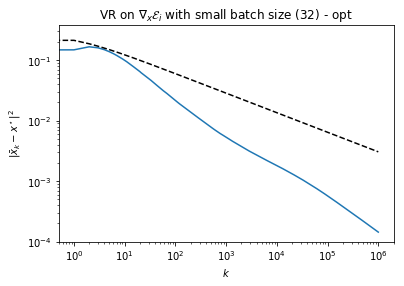

In [135]:
pl.plot(vrbdist)
pl.plot(range(itera), (1.6* np.max(vrbdist))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|\bar{x}_k-x^\star\|^2$')
pl.title(r'VR on $\nabla_x \mathcal{E}_i$ with small batch size ('+str(batchsize[0])+') - opt')
pl.show()

In [91]:
#Run Variance Reduction with big batch on gradE_i
bvrbx, bvrbmu, bvrberg, bvrbfeas, bvrbdist = ic.icgalp_vrb(y, A, batchsize[1], delta, s, b, a, Rho, itera, xstar)

100% (999999 of 999999) |################| Elapsed Time: 0:06:14 Time:  0:06:14


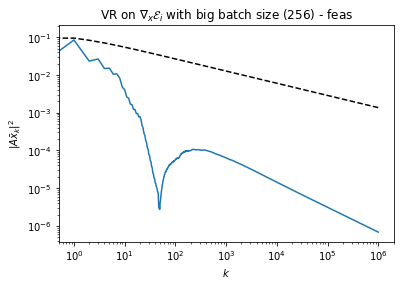

In [136]:
pl.plot(bvrbfeas)
pl.plot(range(itera), (1.4* np.max(bvrbfeas))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|A\bar{x}_k\|^2$')
pl.title(r'VR on $\nabla_x \mathcal{E}_i$ with big batch size ('+str(batchsize[1])+') - feas')
pl.show()

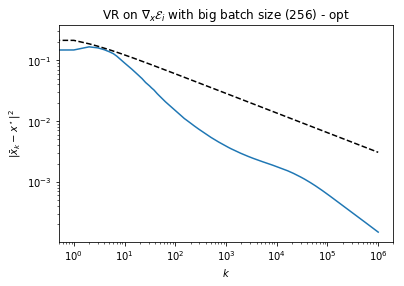

In [139]:
pl.plot(bvrbdist)
pl.plot(range(itera), (1.6* np.max(bvrbdist))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|\bar{x}_k-x^\star\|^2$')
pl.title(r'VR on $\nabla_x \mathcal{E}_i$ with big batch size ('+str(batchsize[1])+') - opt')
pl.show()

In [94]:
#Run sweeping (FULL)
swx, swmu, swerg, swfeas, swdist = ic.icgalp_sw(y, A, delta, b, a, Rho, itera, xstar)

100% (999999 of 999999) |################| Elapsed Time: 0:01:22 Time:  0:01:22


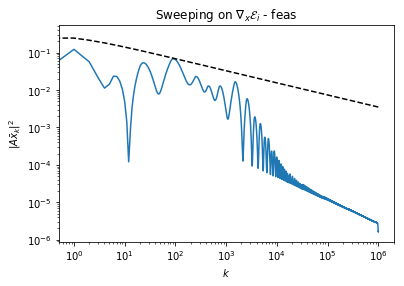

In [140]:
pl.plot(swfeas)
pl.plot(range(itera), (2.5* np.max(swfeas))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|A\bar{x}_k\|^2$')
pl.title(r'Sweeping on $\nabla_x \mathcal{E}_i$ - feas')
pl.show()

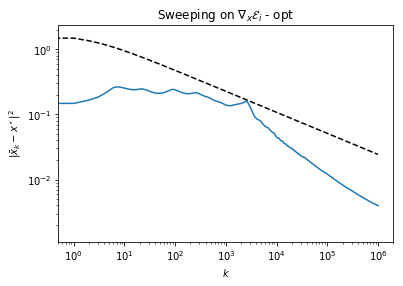

In [96]:
pl.plot(swdist)
pl.plot(range(itera), (8* np.max(swdist))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{b}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$k$')
pl.ylabel(r'$\|\bar{x}_k-x^\star\|^2$')
pl.title(r'Sweeping on $\nabla_x \mathcal{E}_i$ - opt')
pl.show()

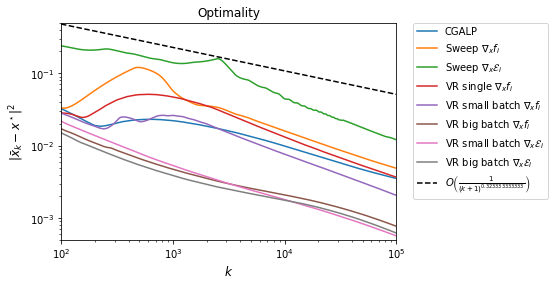

In [107]:
#Plot all optimality results together in loglog scale
pl.plot(cgdist, label='CGALP')
pl.plot(swfdist, label=r'Sweep $\nabla_x f_i$')
pl.plot(swdist, label=r'Sweep $\nabla_x \mathcal{E}_i$')
pl.plot(vrfdist, label=r'VR single $\nabla_x f_i$')
pl.plot(vrfbdist, label=r'VR small batch $\nabla_x f_i$')
pl.plot(bigbdist, label=r'VR big batch $\nabla_x f_i$')
pl.plot(vrbdist, label=r'VR small batch $\nabla_x \mathcal{E}_i$')
pl.plot(bvrbdist, label=r'VR big batch $\nabla_x \mathcal{E}_i$')
pl.plot(range(itera), (8 * np.max([cgdist, swfdist, swdist, vrfdist, vrfbdist, bigbdist, vrbdist, bvrbdist]))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{'+str(b)+r'}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlim(100, 10 ** 5)
pl.ylim(10 ** -3 / 2, 0.5)
pl.xlabel(r'$k$',fontname="sans-serif", fontsize="12")
pl.ylabel(r'$\|\bar{x}_k-x^\star\|^2$',fontname="serif", fontsize="12")
pl.title('Optimality')
pl.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#pl.savefig(str(n)+'_opt.eps', bbox_inches='tight')
pl.show()

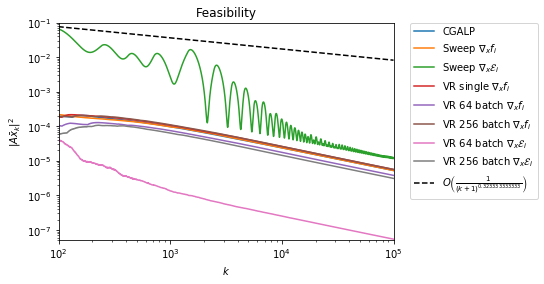

In [106]:
#Plot all feasbility results together in loglog scale
pl.plot(cgfeas, label='CGALP')
pl.plot(swffeas, label=r'Sweep $\nabla_x f_i$')
pl.plot(swfeas, label=r'Sweep $\nabla_x \mathcal{E}_i$')
pl.plot(vrffeas, label=r'VR single $\nabla_x f_i$')
pl.plot(vrfbfeas, label=r'VR 64 batch $\nabla_x f_i$')
pl.plot(bigbfeas, label=r'VR 256 batch $\nabla_x f_i$')
pl.plot(vrbfeas, label=r'VR 64 batch $\nabla_x \mathcal{E}_i$')
pl.plot(bvrbfeas, label=r'VR 256 batch $\nabla_x \mathcal{E}_i$')
pl.plot(range(itera), (2.5 * np.max([cgfeas, swffeas, swfeas, vrffeas, vrfbfeas, bigbfeas, vrbfeas, bvrbfeas]))/((np.array(range(itera)) + 1) ** b), 'k--', label=r'$O\left(\frac{1}{(k+1)^{'+str(b)+r'}}\right)$')
pl.xscale('log')
pl.yscale('log')
pl.xlim(100, 10 ** 5)
pl.ylim(11 ** -7, 0.1)
pl.xlabel(r'$k$')
pl.ylabel(r'$\|A\bar{x}_k\|^2$')
pl.title('Feasibility')
pl.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#pl.savefig(str(n)+'_feas.eps', bbox_inches='tight')
pl.show()

In [99]:
#These commands save the parameters used for later use in matlab or numpy

#matlab saving
#adict = {}
#adict['n'] = n
#adict['A'] = A
#adict['y'] = y.transpose()
#sio.savemat(str(n)+'_params.mat', adict)

#numpy saving
#np.save(str(n)+'_params', np.array([A, y], dtype=object))